# <font color = "Brown" size = 6> **BLOOD PRESSURE ABNORMAL** </font>

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import pandas as pd
bp =pd.read_csv("D:\dataset python\Patient_with_abnormal_bloodpressure.csv")
bp

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


C:\Users\Asus VivoBook\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'level of Homoglobin')

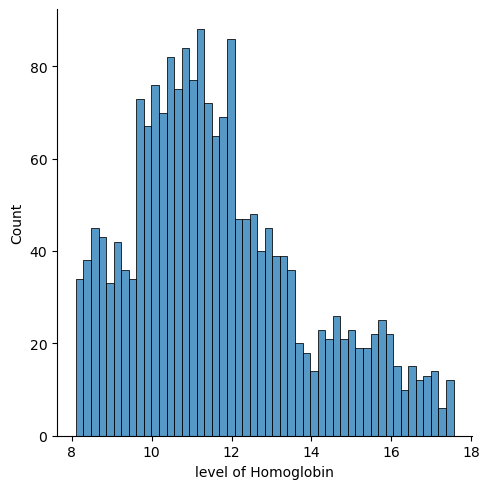

In [48]:
sns.displot(bp.Level_of_Hemoglobin ,bins = 50 ,edgecolor ='black')
plt.xlabel('level of Homoglobin')

## Data Cleaning

In [59]:
bp.Genetic_Pedigree_Coefficient=bp.Genetic_Pedigree_Coefficient.fillna(bp.Genetic_Pedigree_Coefficient.mean())
bp.Pregnancy=bp.Pregnancy.fillna(0)
bp.alcohol_consumption_per_day=bp.alcohol_consumption_per_day.fillna(0)

### No Null is find  

In [60]:
bp.isnull().sum()[bp.isnull().sum()>0]

Series([], dtype: int64)

In [61]:
bp = bp.drop('Patient_Number',axis=1)   # Drop the Patient no column

## Random Sampling

In [62]:
from sklearn.model_selection import train_test_split
bp_train,bp_test =train_test_split(bp ,test_size=.25)

bp_train_x =bp_train.iloc[:,1::]
bp_train_y =bp_train.iloc[:,0]

bp_test_x =bp_test.iloc[:,1::]
bp_test_y =bp_test.iloc[:,0]

In [63]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()

In [64]:
logreg.fit(bp_train_x,bp_train_y)  # Build the model in Logistic Regression


LogisticRegression()

In [65]:
pred_test_bp = logreg.predict(bp_test_x)  # predict the value

In [66]:
 from sklearn.metrics import confusion_matrix , precision_score ,recall_score ,accuracy_score , f1_score,classification_report

confusion_matrix(bp_test_y ,pred_test_bp)

array([[153,  96],
       [120, 131]], dtype=int64)

In [67]:
accuracy_score(bp_test_y ,pred_test_bp)*100    # Model Accuracy is 56% 

56.8

In [68]:
precision_score(bp_test_y ,pred_test_bp)*100

57.70925110132159

In [69]:
recall_score(bp_test_y ,pred_test_bp)*100

52.191235059760956

In [70]:
f1_score(bp_test_y ,pred_test_bp)*100

54.811715481171554

In [71]:
print(classification_report(bp_test_y ,pred_test_bp))

              precision    recall  f1-score   support

           0       0.56      0.61      0.59       249
           1       0.58      0.52      0.55       251

    accuracy                           0.57       500
   macro avg       0.57      0.57      0.57       500
weighted avg       0.57      0.57      0.57       500



# Deession Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()

dt.fit(bp_train_x ,bp_train_y)

DecisionTreeClassifier()

In [73]:
pred_test_dt = dt.predict(bp_test_x)

In [74]:
confusion_matrix(bp_test_y ,pred_test_dt)

array([[208,  41],
       [ 42, 209]], dtype=int64)

In [75]:

accuracy_score(bp_test_y , pred_test_dt)*100   # Accuracy of model is 84.6% 

83.39999999999999

In [76]:
print(classification_report(bp_test_y ,pred_test_dt))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       249
           1       0.84      0.83      0.83       251

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [77]:
# predict can also be done in prob

dt.predict_proba(bp_test_x)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [78]:
len(dt.feature_importances_)


13

In [79]:
dt.feature_importances_.sum()

1.0000000000000002

In [80]:
bp_train_x.columns

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI',
       'Sex', 'Pregnancy', 'Smoking', 'Physical_activity',
       'salt_content_in_the_diet', 'alcohol_consumption_per_day',
       'Level_of_Stress', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [81]:
dt.feature_importances_  # Higher the value more the significand is the variable while definig the y variable

array([0.29638011, 0.26867124, 0.02407459, 0.03278051, 0.012867  ,
       0.        , 0.00622944, 0.02818781, 0.04410625, 0.04141276,
       0.01042586, 0.19018431, 0.04468013])

In [82]:
df_feat_sig = pd.DataFrame()

df_feat_sig['Features']= bp_train_x.columns
df_feat_sig['Imp'] = dt.feature_importances_


df_feat_sig=df_feat_sig.sort_values('Imp', ascending=False)
df_feat_sig

,Features,Imp
0,Level_of_Hemoglobin,0.296380
1,Genetic_Pedigree_Coefficient,0.268671
11,Chronic_kidney_disease,0.190184
12,Adrenal_and_thyroid_disorders,0.044680
8,salt_content_in_the_diet,0.044106
9,alcohol_consumption_per_day,0.041413
3,BMI,0.032781
7,Physical_activity,0.028188
2,Age,0.024075
4,Sex,0.012867


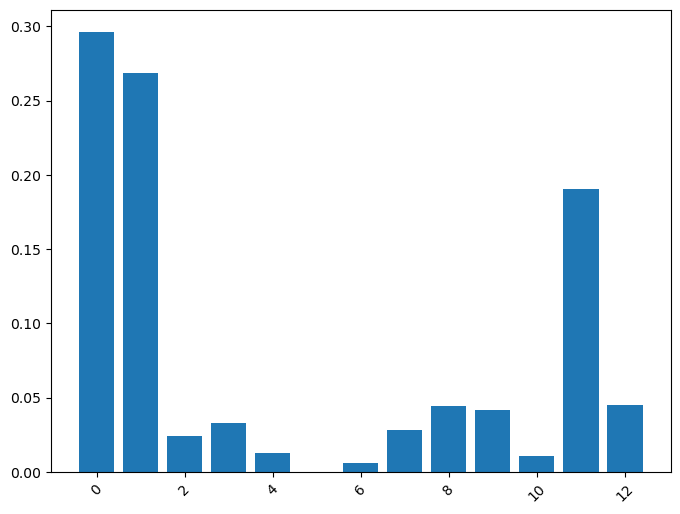

In [90]:
plt.figure(figsize=(8,6))
plt.bar(df_feat_sig.index,df_feat_sig['Imp'])
plt.xticks(rotation =45);

In [83]:
df_feat_sig.Imp[0:8].sum()  # there are 8 significant x variable and 4 insignificant x variable are removing

0.9464031136251372

In [84]:
l1=list(df_feat_sig.Features[0:8])
l1

['Level_of_Hemoglobin',
 'Genetic_Pedigree_Coefficient',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders',
 'salt_content_in_the_diet',
 'alcohol_consumption_per_day',
 'BMI',
 'Physical_activity']

In [85]:
l1.insert(0,'Blood_Pressure_Abnormality')

bp = bp.loc[:,l1]
bp.shape

(2000, 9)

In [86]:
from sklearn.model_selection import train_test_split
bp_train,bp_test =train_test_split(bp ,test_size=.25)

bp_train_x =bp_train.iloc[:,1::]
bp_train_y =bp_train.iloc[:,0]

bp_test_x =bp_test.iloc[:,1::]
bp_test_y =bp_test.iloc[:,0]

In [87]:

from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(bp_train_x ,bp_train_y) 

DecisionTreeClassifier()

In [88]:
pred_test_dt = dt.predict(bp_test_x)

confusion_matrix(bp_test_y,pred_test_dt)

array([[204,  43],
       [ 44, 209]], dtype=int64)

In [89]:
print(classification_report(bp_test_y ,pred_test_dt))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       247
           1       0.83      0.83      0.83       253

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500

